# Exploratory Data Analysis

Structure:
1. Labels
2. Features
3. Relationship

Notes: Since all of the values here represents the player performance, missing
values are filled with 0 as explained in the cleaning step.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from csgo_cheater_detection.config.config import data_path, image_path
from csgo_cheater_detection.config.visuals import *

In [2]:
# load data
df = pd.read_csv(f'{data_path}\\csgo_cheater_data_8_30_20_full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14127 entries, 0 to 14126
Columns: 190 entries, total_planted_bombs to total_headshots_per_round
dtypes: bool(1), float64(187), int64(2)
memory usage: 20.4 MB


## Part 1: Labels

There are two important points about the labels:
1. As with most other fraud detection dataset, our data is also imbalanced. The data
consists of 83% non-cheater and 17% cheater. Many techniques can be used to
remedy the imbalance like sampling methods, class weights, initial bias...In part 3 and 4
we will apply these techniques and see how it can improve the prediction drastically.
2. Steam APIs give a 1 if a user get banned at any game which mean a user does not
necessarily cheat at CS:GO. Multiple criteria are used to make sure the label \
is correct (see collection process). Moreover, the data comes from the websites
that check ban status of a player which means the data is skewed toward cheater
more than usual. Nevertheless, at 17%, the cheater percentage is quite optimistic.

In [3]:
df.label.value_counts(normalize=True)

False    0.825441
True     0.174559
Name: label, dtype: float64

Interesting findings:
1. Cheaters has a better accuracy in bizon and a much worse accuracy in AWP.
AWP is a very high skill floor weapon while bizon has a low skill floor.
2. Cheaters have a much higher win ratio

In [34]:
# remove columns where win ratio is greater than 1
df = df[df.win_ratio < 1]

# cheater dataset
df_cheater = df[df.label==True]
df_non_cheater = df[df.label==False]

In [36]:
# accuracy of cheaters
accuracy_cols = [col for col in df_cheater.columns if 'accuracy' in col]
for col in accuracy_cols:
    print(
        f'{col}  \
        {df_cheater[col].mean() - df_non_cheater[col].mean()}'
    )


total_accuracy          0.0006925028852778625
accuracy_deagle          0.0036190152026972233
accuracy_glock          -0.0002164198813533469
accuracy_elite          -0.0008104066021587808
accuracy_fiveseven          0.005325738714220651
accuracy_awp          -0.5473115521739573
accuracy_ak47          0.0019140753050459758
accuracy_aug          -0.0025014932001490298
accuracy_famas          -0.00044295932604696
accuracy_g3sg1          0.0035866736372713315
accuracy_p90          -0.0007125038786789661
accuracy_mac10          0.00040968684201517225
accuracy_ump45          -0.001582094719617455
accuracy_xm1014          -0.006951647747913292
accuracy_m249          0.0023175017647572294
accuracy_hkp2000          0.00010562916331011141
accuracy_p250          0.0015964919683154333
accuracy_sg556          -0.0028497566203036784
accuracy_scar20          0.0037852908436978583
accuracy_ssg08          0.007973362390185312
accuracy_mp7          -0.0010158410613334279
accuracy_mp9          -0.00436073

d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'Win ratio distribution of cheaters and non-cheaters')

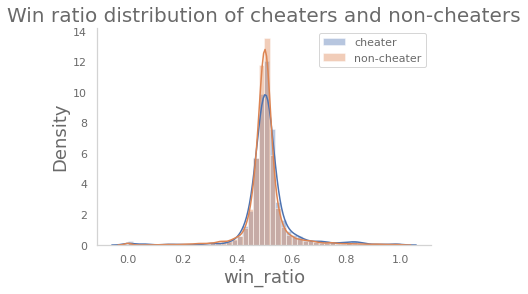

In [43]:
# difference between win ratio
sns.distplot(df_cheater['win_ratio'], label='cheater')
sns.distplot(df_non_cheater['win_ratio'], label='non-cheater')
plt.legend(loc='upper right')
plt.title('Win ratio distribution of cheaters and non-cheaters')

d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'kill_to_death_ratio distribution of cheaters and non-cheaters')

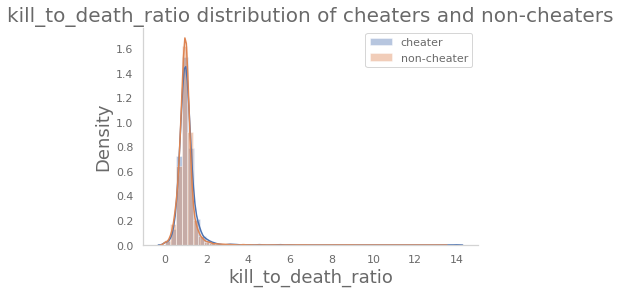

In [47]:
# difference between win ratio
sns.distplot(df_cheater['kill_to_death_ratio'], label='cheater')
sns.distplot(df_non_cheater[df_non_cheater.kill_to_death_ratio < 14]['kill_to_death_ratio'], label='non-cheater')
plt.legend(loc='upper right')
plt.title('kill_to_death_ratio distribution of cheaters and non-cheaters')

d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\pycharmprojects\my_projects\venv\lib\site-packages\seaborn\distributions.py:305: Us

Text(0.5, 1.0, 'total_wins_per_hour distribution of cheaters and non-cheaters')

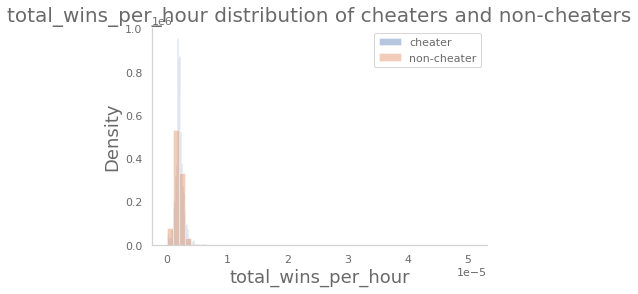

In [48]:
# difference between win ratio
sns.distplot(df_cheater['total_wins_per_hour'], label='cheater')
sns.distplot(df_non_cheater['total_wins_per_hour'], label='non-cheater')
plt.legend(loc='upper right')
plt.title('total_wins_per_hour distribution of cheaters and non-cheaters')

## Part 2: Features

What are some features here that is interesting to see?
Histograms/ bar plot, ....

In [45]:
df.kill_to_death_ratio.describe()

count    13747.000000
mean         1.466649
std         53.193017
min          0.000000
25%          0.821036
50%          0.978860
75%          1.136748
max       6237.526135
Name: kill_to_death_ratio, dtype: float64

## Part 3: Relationship

Is there any relationship between variables here?

## Conclusion


In [25]:
[col for col in df_cheater.columns if 'total' in col]

['total_planted_bombs',
 'total_damage_done',
 'total_money_earned',
 'total_rescued_hostages',
 'total_kills_knife',
 'total_kills_glock',
 'total_kills_deagle',
 'total_kills_elite',
 'total_kills_fiveseven',
 'total_kills_xm1014',
 'total_kills_ump45',
 'total_kills_p90',
 'total_kills_awp',
 'total_kills_ak47',
 'total_kills_aug',
 'total_kills_famas',
 'total_kills_g3sg1',
 'total_kills_m249',
 'total_kills_enemy_weapon',
 'total_wins_pistolround',
 'total_wins_map_cs_assault',
 'total_wins_map_cs_office',
 'total_wins_map_de_dust2',
 'total_wins_map_de_inferno',
 'total_weapons_donated',
 'total_kills_enemy_blinded',
 'total_kills_against_zoomed_sniper',
 'total_dominations',
 'total_domination_overkills',
 'total_revenges',
 'total_rounds_map_cs_assault',
 'total_rounds_map_cs_office',
 'total_rounds_map_de_dust2',
 'total_rounds_map_de_inferno',
 'total_rounds_map_de_lake',
 'total_gun_game_rounds_won',
 'total_gun_game_rounds_played',
 'total_wins_map_de_vertigo',
 'total_matc